In [59]:
import torch
from torchvision import transforms, datasets, models
import os
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [5]:
device = "gpu" if torch.cuda.is_available() else "cpu"

In [8]:
device

'cpu'

In [13]:
# define training and test data directories
data_dir = 'flower_photos/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [16]:
data_transforms = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])
train_data = datasets.ImageFolder(train_dir, transform=data_transforms)
test_data = datasets.ImageFolder(test_dir, transform=data_transforms)

print("Train data : ", len(train_data))
print("Test data : ", len(test_data))

Train data :  3130
Test data :  540


In [17]:
batch_size = 20
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

In [18]:
data_iter = iter(train_loader)

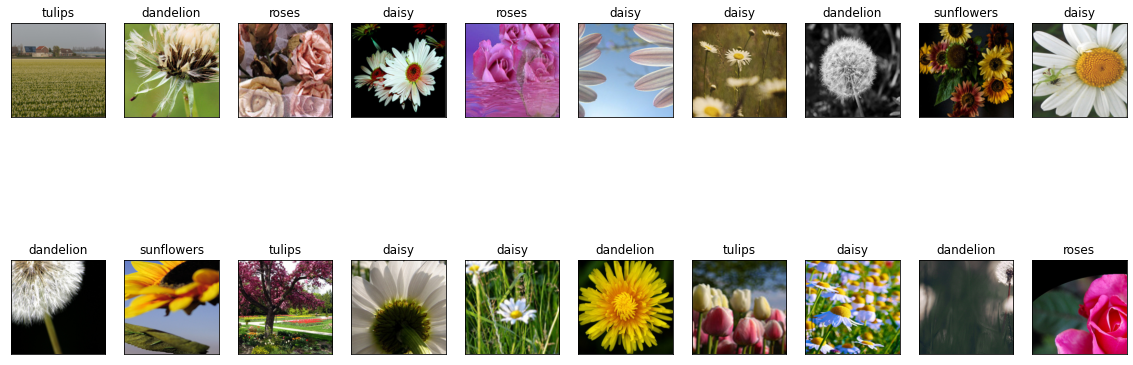

In [24]:
images , labels = data_iter.next()
images = images.numpy()
plt.figure(figsize=(20,8))
for idx in range(20):
    ax = plt.subplot(2,10, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1,2,0)))
    ax.set_title(classes[labels[idx]])

In [55]:
vgg16 = models.vgg16(pretrained=True)

print(vgg16)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [56]:
for param in vgg16.parameters():
    param.requires_grad = False

In [57]:
n_inputs = vgg16.classifier[6].in_features
n_inputs

4096

In [58]:
last_layer = nn.Linear(n_inputs, len(classes))
vgg16.classifier[6] = last_layer

if device == 'gpu':
    vgg16.cuda()

vgg16.classifier[6]

Linear(in_features=4096, out_features=5, bias=True)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [66]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
n_epochs = 2

for epoch in range(n_epochs):
    train_loss = 0.
    for batch_idx, (images, labels) in enumerate(train_loader):
        if device == 'gpu':
            images.to(device)
            labels.to(device)
        optimizer.zero_grad()
        output = vgg16(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        if batch_idx % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_idx + 1, train_loss / 20))
            train_loss = 0.0

Epoch 0, Batch 20 loss: 1.5882847905158997
Epoch 0, Batch 40 loss: 1.4197134852409363
Epoch 0, Batch 60 loss: 1.2966470062732696
Epoch 0, Batch 80 loss: 1.1574262022972106
Epoch 0, Batch 100 loss: 1.0935920417308806
Epoch 0, Batch 120 loss: 1.0855053693056107
